# TDA: Persistent Homology 

Here we explore the various PH algorithms that are integrated into the TDA toolkit.  These include;
- DIPHA; https://github.com/DIPHA/dipha
- RIPSER; https://github.com/Ripser
- Cubical RIPSER; https://github.com/CubicalRipser
- PERSEUS; http://people.maths.ox.ac.uk/nanda/perseus/index.html
- PHAT; https://github.com/blazs/phat



In [1]:
#  Import the TDA toolkit
import TDA

#  Here are the available classes and methods in TDA:
dir(TDA)

['CubicalRipser2D',
 'CubicalRipser3D',
 'Perseus',
 'Ripser',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'compute_2DPHD',
 'compute_2DPHD_from_file',
 'convert_binary_cells_to_point_cloud',
 'convert_csv_to_dipha',
 'np',
 'pd',
 'plot_barcode_diagram',
 'plot_barcode_diagram_from_file',
 'plot_persistence_diagram',
 'plot_persistence_diagram_from_file',
 'plt',
 'save_array_to_dipha',
 'save_binary_cells_to_point_cloud',
 'struct']

There are currently 4 Persistent Homology classes; CubicalRipser2D, CubicalRipser3D, Perseus and Ripser.  Each of them have a default constructor, destructor and a ComputeBarcode() method:

In [2]:
dir(TDA.CubicalRipser2D)

['ComputeBarcode',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'getBarcode']

# Cubical Ripser 2D

Let's examine each of these PH functions.  First, CubicalRipser2D takes the following function arguments;

**CubicalRipser2D::ComputeBarcode(string input_file, string output_file, string format, string method, double threshold, bool print)**

Where the input file is either DIPHA or PERSEUS formatted file with the 2D persistence image condensed into a single vector.  The method can either be the Linkfind method () or the Compute Pairs method ().  The Print option will print the results to the screen.


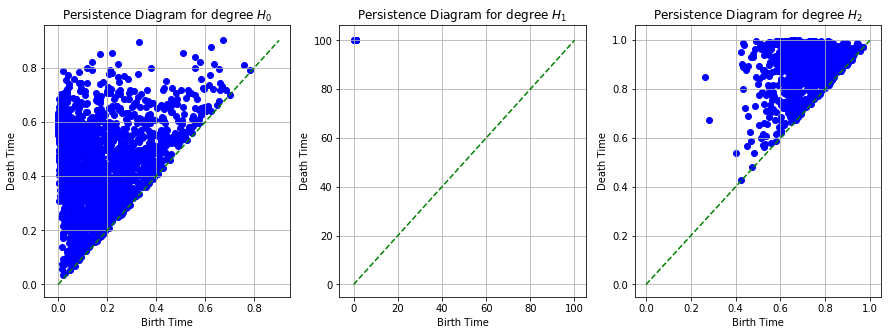

In [3]:
#  Create a CubicalRipser2D object
cube2D = TDA.CubicalRipser2D()

#  Try one of the examples in the dat/ folder
cube2D.ComputeBarcode("algorithms/CubicalRipser_2dim/dat/test_2_100.complex", "test.csv", "DIPHA", "LINKFIND", 100, True)
barcode = cube2D.getBarcode()
TDA.plot_persistence_diagram(barcode)

We can also plot a barcode diagram

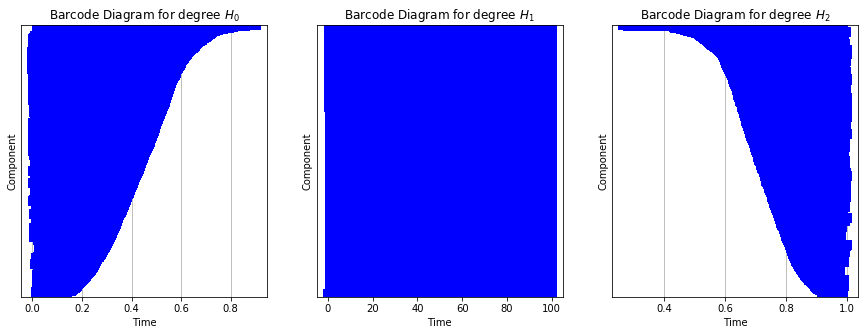

In [4]:
TDA.plot_barcode_diagram(barcode)

To compute the Persistent Homology Dimension, we simply call

[-6.88504932  1.91976036]


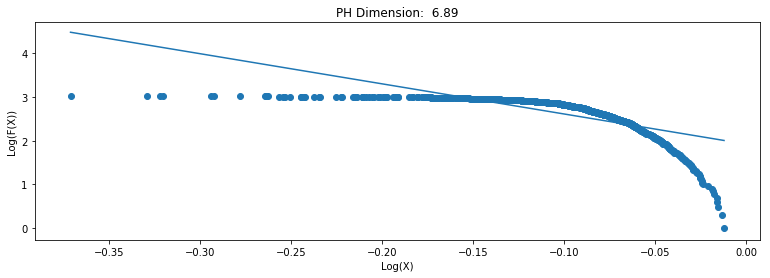

In [5]:
TDA.compute_2DPHD(barcode)

Let's try to see if CubicalRipser2D can find the Homology of a circle S^1

Saved array to DIPHA format file grid_test.csv



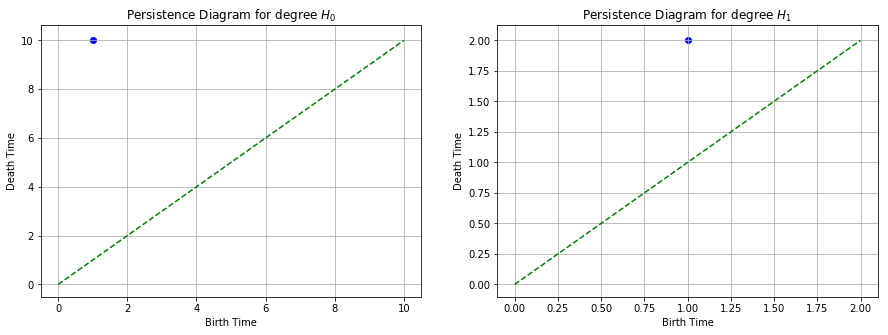

In [6]:
# Create 3x3 2D pixel array
grid = [[1,1,1],[1,2,1],[1,1,1]]

# save as dipha format
TDA.save_array_to_dipha(grid, "grid_test.csv")

#  Compute the barcode
cube2D.ComputeBarcode("grid_test.csv", "test.csv", "DIPHA", "LINKFIND", 10, True)

#  Plot the persistence diagram
TDA.plot_persistence_diagram_from_file("test.csv")

Or together

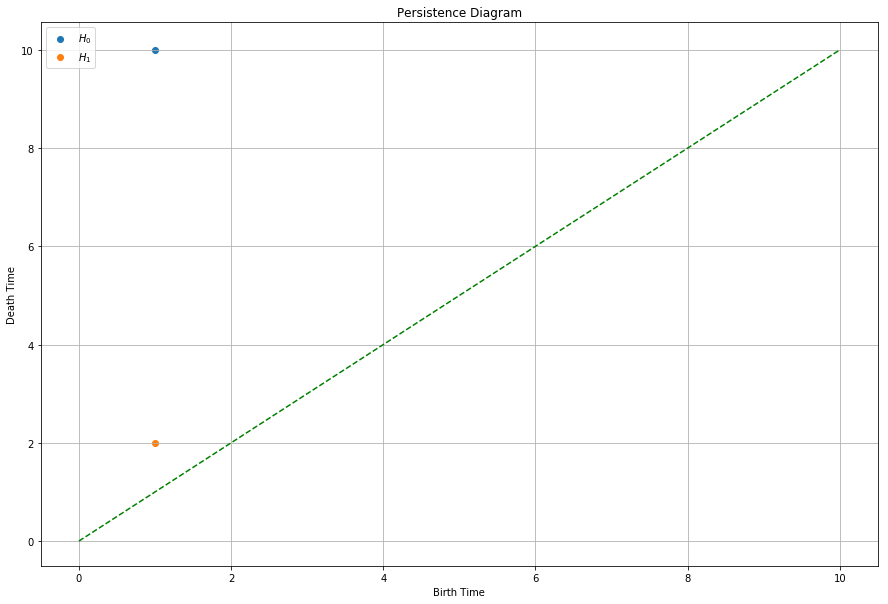

In [7]:
TDA.plot_persistence_diagram_from_file("test.csv", split=False)

And the corresponding barcode

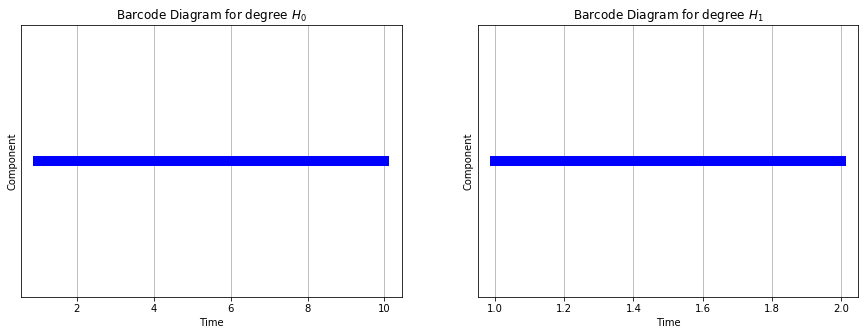

In [8]:
TDA.plot_barcode_diagram_from_file("test.csv")

And of course the Persistent Homology Dimension

[-0.  0.]


/home/ncarrara/Desktop/TDA/TDA.py:252: RankWarning: Polyfit may be poorly conditioned
  slope = np.polyfit(logPH[:, 0], logPH[:, 1], 1)


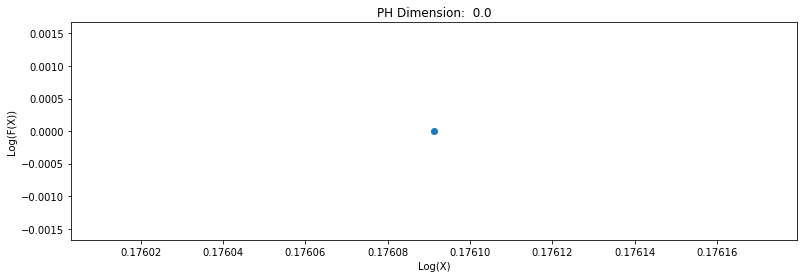

In [9]:
TDA.compute_2DPHD_from_file("test.csv")

# Cubical Ripser 3D

CubicalRipser3D takes a similar set of arguments in its ComputeBarcode() method;

**CubicalRipser3D::ComputeBarcode(string input_file, string output_file, string format, string method, double threshold, bool print)**

In which the format types are the same as CubicalRipser2D.  

In [10]:
#  Create a CubicalRipser3D object
cube3D = TDA.CubicalRipser3D()

#  Try one of the examples in the dat/ folder
#  cube3D.ComputeBarcode("algorithms/CubicalRipser_3dim/dat/3dimsample.txt", "test.csv", "DIPHA", "LINKFIND", 100, True)

# PERSEUS

The ComputeBarcode() method in PERSEUS has the following parameters;

**Perseus::ComputeBarcode(string input_type, string infile, string outfile, string eng)**

Where input_type is either one of the following;

     - "debug"            Compute Khale's random rips on N-vertices
     - "cubtop"           Dense cubical grid
     - "scubtop"          Sparse cubical grid
     - "rips"             Point-radius paris for rips-complex
     - "brips"            Rips with different initial radii
     - "brips-capped"
     - "brips2"           Rips with common initial radii
     - "brips_comrad_capped" or "brips_capped_comrad"   Rips with capped dimension
     - "brips_witness"    Witnessed rips-complex
     - "distmat"          Rips-complex for a distance matrix
     - "corrmat"          Rips-complex for a correlation matrix
     - "timeser"          Time series data
     - "simtop"           List of top simplices, all of the same dimension
     - "simtop_static"    Manifold stoplex with no birth time information
     - "nmfsimtop"        List of top simplices of different dimensions
     - "nmfsimtop_capped"
     - "nmfsimtop_static_capped"
     - "nmfsimtop_static"
     - "ricci"            to run: ./perseus ricci "simtop file" "edge info"
     - "bary"             Barycentric coordinates?
     - "cubmov"
     
 The "eng" parameter stands for engine, which has the possible inputs;
 
     - "r"                Reduce and Update
     - "c"                Coreduce and Update
     - "s"                Skip coreductions

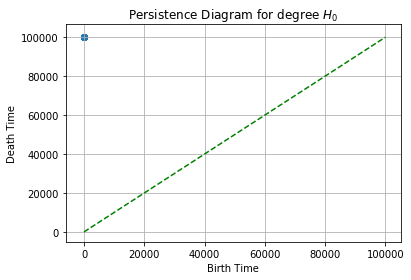

In [11]:
#  Create Perseus object
pers = TDA.Perseus()

#  Compute a Barcode for one of the examples in the Ripser data set
pers.ComputeBarcode("distmat", "algorithms/Ripser/examples/random16.lower_distance_matrix", "test", "r")

#  Plot persistence diagram
barcode = pers.getBarcode()
TDA.plot_persistence_diagram(barcode)

With the corresponding Barcode

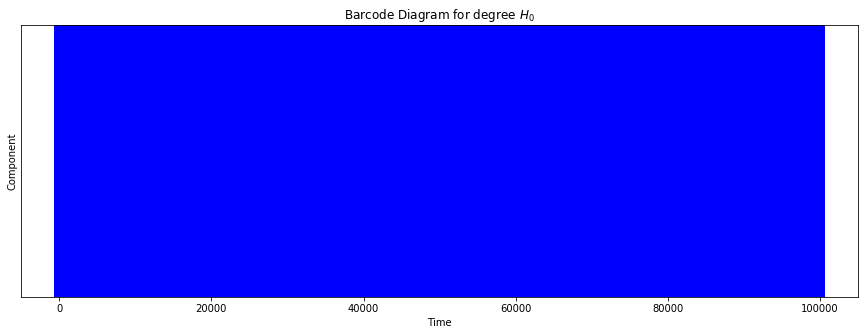

In [12]:
TDA.plot_barcode_diagram(barcode)

# RIPSER

Ripser is by far the fastest algorithm, whose ComputeBarcode() method takes the following inputs;

**Ripser::ComputeBarcode(const char* filename, long dim, float thres, float rat, std::string form, long mod)**

Where "dim" is the dimension of the data, "thres" is the threshold, "rat" is the ratio, "form" is the format of the file which can have the possible values

     - "upper-distance"    upper triangular distance matrix
	 - "distance"          full distance matrix
	 - "point-cloud"       point cloud in Euclidean space
	 - "dipha"             distance matrix in DIPHA file format
	 - "ripser"            distance matrix in Ripser binary file format

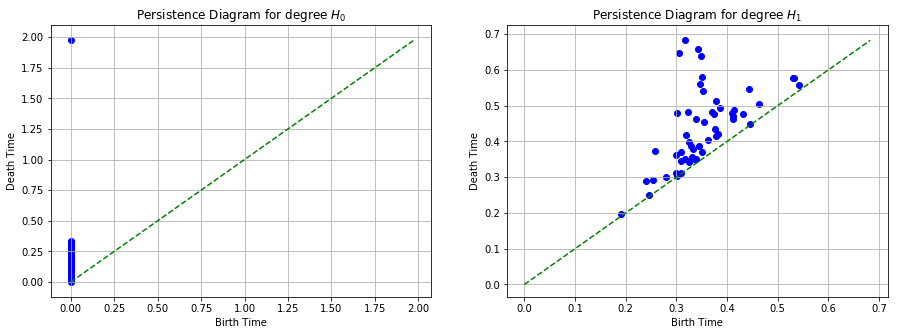

In [13]:
#  Create a Ripser object
rips = TDA.Ripser()

#  Compute a barcode from one of the examples
rips.ComputeBarcode("algorithms/Ripser/examples/sphere_3_192.lower_distance_matrix",1,0,1,"",1)

#  Plot persistence diagram
barcode = rips.getBarcode()
TDA.plot_persistence_diagram(barcode)

With the corresponding barcode

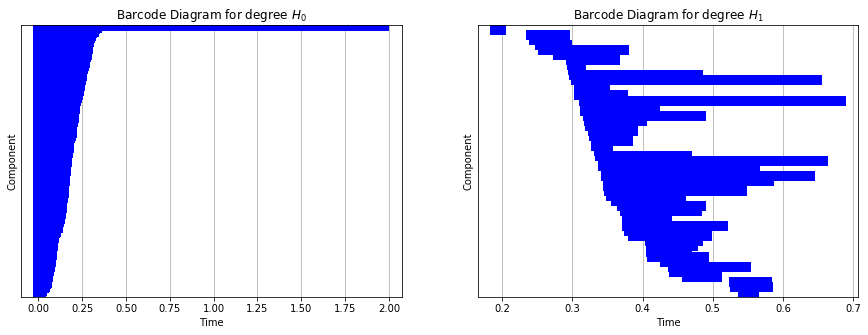

In [14]:
TDA.plot_barcode_diagram(barcode)

To see how Ripser works, lets try the following 2D cell complex with the homology of S^1

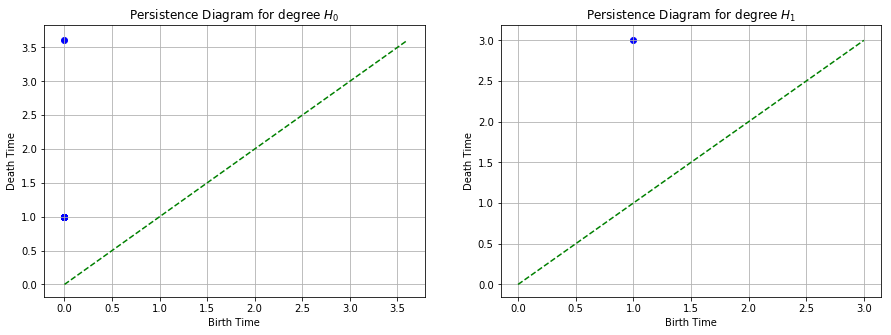

In [15]:
#  Create a Ripser object
rips2 = TDA.Ripser()

# Create 3x3 2D pixel array
grid = [[1,1,1,1],[1,0,0,1],[1,0,0,1],[1,1,1,1]]

# save as point cloud format
TDA.save_binary_cells_to_point_cloud(grid, "grid_test.csv")

# Run ripser on this
rips2.ComputeBarcode("grid_test.csv",2,10,1,"point-cloud",1)

# Plot the barcode
barcode = rips2.getBarcode()
TDA.plot_persistence_diagram(barcode)

With the corresponding barcode

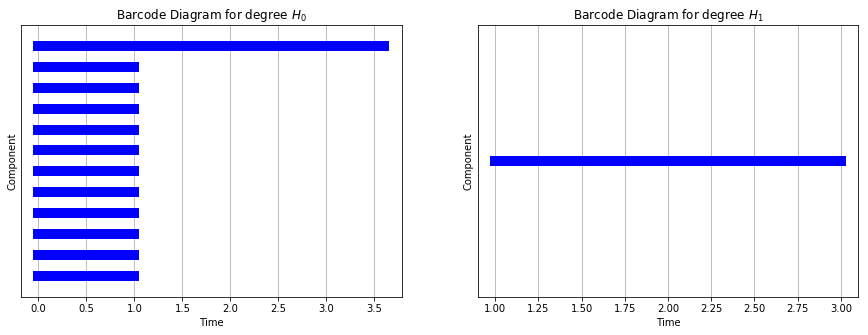

In [16]:
TDA.plot_barcode_diagram(barcode)